# Preprocess Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')


In [2]:
df = pd.read_csv("resources/stroke-data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# df.drop(df[df['bmi'] > 65].index, inplace=True)

# Drop 'id' column

In [6]:
df = df.drop(['id'], axis=1)

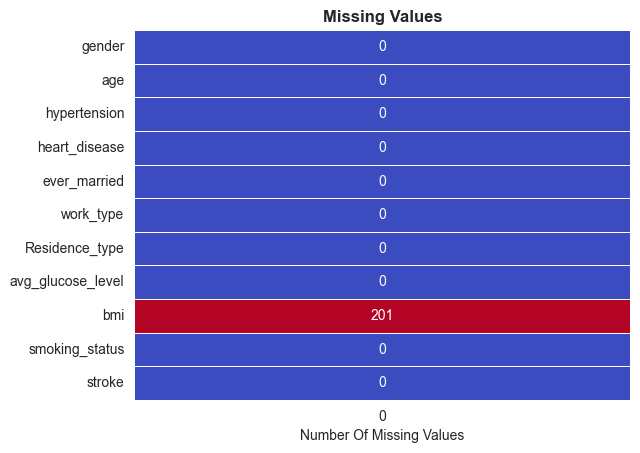

In [7]:
def display_missing_values():
    plt.title('Missing Values',fontweight='bold')
    ax = sns.heatmap(df.isna().sum().to_frame(), annot=True, fmt='d', cmap='coolwarm', linewidths=0.5,cbar=False)
    ax.set_xlabel('Number Of Missing Values')
    plt.show()
display_missing_values()

### Fill missing values

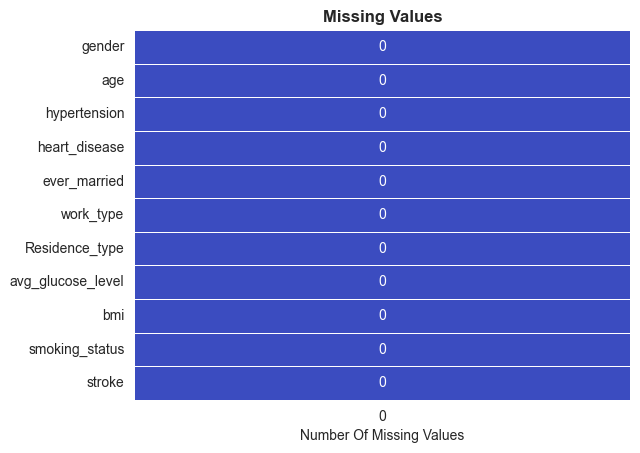

In [8]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
display_missing_values()

# Look at the Data

In [9]:
round (df[['age', 'avg_glucose_level', 'bmi']].describe(), 2)

,age,avg_glucose_level,bmi
count,5110.00,5110.00,5110.00
mean,43.23,106.15,28.89
std,22.61,45.28,7.70
min,0.08,55.12,10.30
25%,25.00,77.24,23.80
50%,45.00,91.88,28.40
75%,61.00,114.09,32.80
max,82.00,271.74,97.60


In [10]:
round (df.describe(exclude = ['float', 'int64']), 2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


# Numeric Variable Distribution

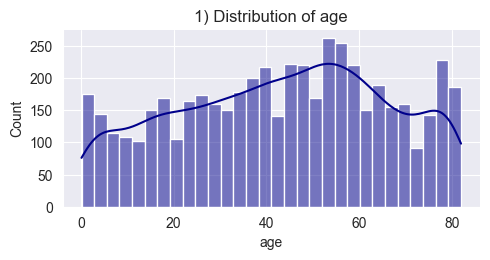

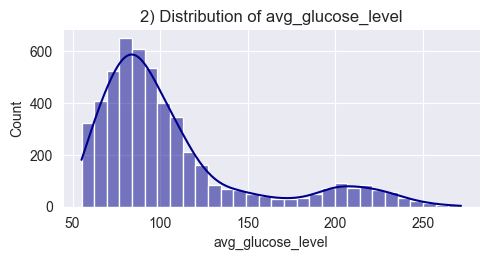

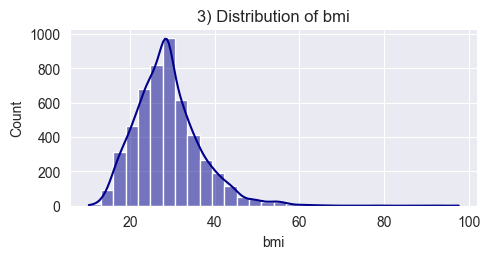

In [11]:
for idx,col in enumerate(df[['age','avg_glucose_level', 'bmi' ]].columns):
    sns.displot(df[col], bins=30, kde=True, color='darkblue', height=2.5, aspect=2)\
        .set(xlabel=col,title=f'{idx + 1}) Distribution of {col}')

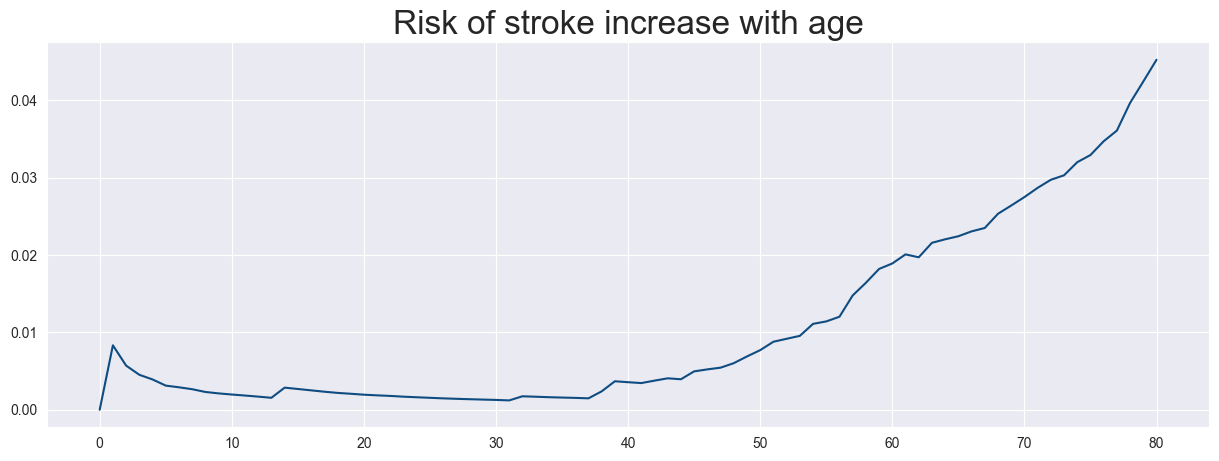

In [12]:
rate = []
ages = df['age'].astype(int)
for i in range(ages.min() + 1, ages.max()):
    rate.append((df[df['age'] < i]['stroke'].sum() / len(df[df['age'] < i]['stroke'])))
    
fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(data=rate,color='#0f4c81', ax = ax).set_title("Risk of stroke increase with age",fontsize=24)
plt.show()

# Model preparation

In [13]:
df[(df['smoking_status'] == 'never smoked') & (df['stroke'] == 1)].count()

gender               90
age                  90
hypertension         90
heart_disease        90
ever_married         90
work_type            90
Residence_type       90
avg_glucose_level    90
bmi                  90
smoking_status       90
stroke               90
dtype: int64

In [14]:
from category_encoders import TargetEncoder

labels_to_encode = ['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status']

encoder = TargetEncoder()

for label in labels_to_encode:
    df[label] = encoder.fit_transform(df[label], df['stroke'])

In [15]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.051064,67.0,0,1,0.065613,0.050940,0.052003,228.69,36.600000,0.079096,1
1,0.047094,61.0,0,0,0.065613,0.079365,0.045346,202.21,28.893237,0.047569,1
2,0.051064,80.0,0,1,0.065613,0.050940,0.045346,105.92,32.500000,0.047569,1
3,0.047094,49.0,0,0,0.065613,0.050940,0.052003,171.23,34.400000,0.053232,1
4,0.047094,79.0,1,0,0.065613,0.079365,0.045346,174.12,24.000000,0.047569,1


# Correlations 

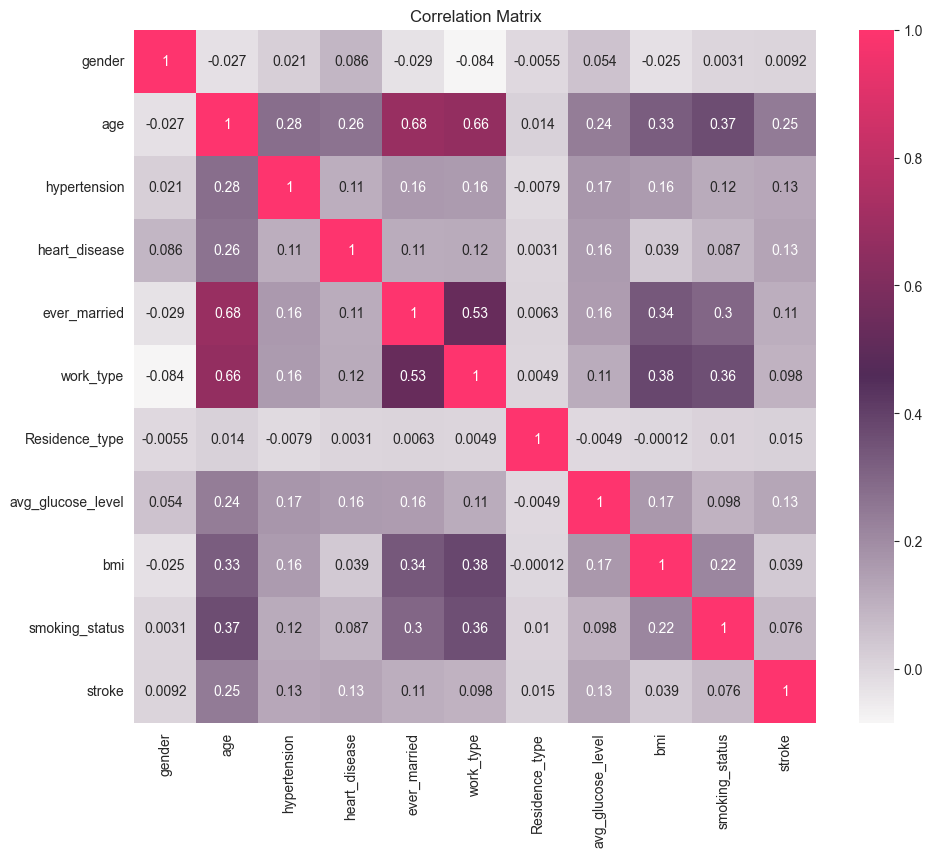

In [16]:
colors = ['#f6f5f5','#512b58','#fe346e']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr(), annot=True,cmap= colormap, facecolor='#f6f5f5', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

## Split dataset

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(['stroke'], axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Balance dataset

In [18]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

Text(0.5, 1.0, 'Stroke')

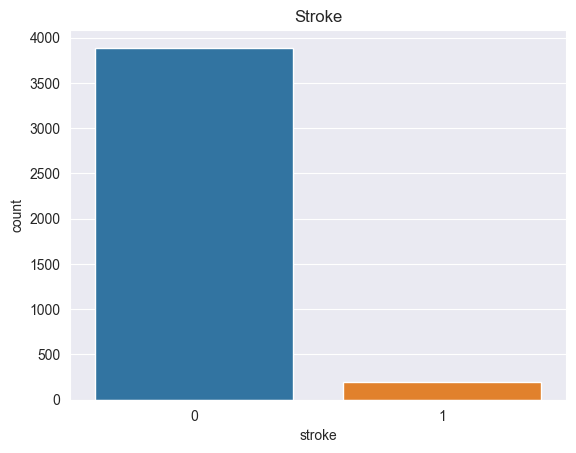

In [19]:
sns.countplot(x=y_train)
plt.title('Stroke')

In [20]:
oversampler = SMOTE(sampling_strategy = 1)

X_train_init = X_train
y_train_init = y_train

X_train, y_train = oversampler.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Stroke')

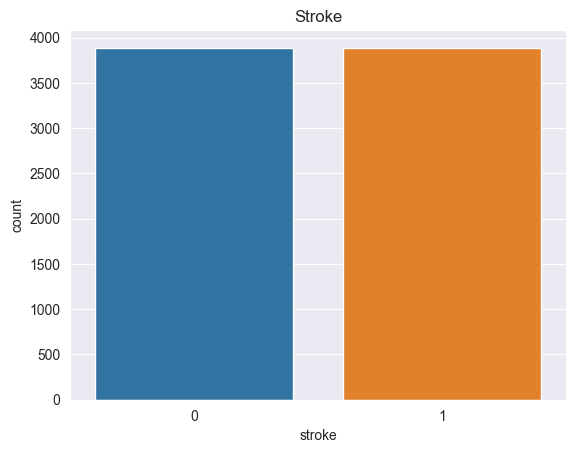

In [21]:
sns.countplot(x=y_train)
plt.title('Stroke')

# Building models

In [22]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve, auc, recall_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [23]:
def get_pipeline(model, include_scaling):
    steps = [['smote', SMOTE(random_state=11)],
             ['classifier', model]]
    if include_scaling:
        steps.insert(1, ['scaler', StandardScaler()])
    
    return Pipeline(steps = steps)

In [24]:
def display_confution_matrix(name, y_test, y_pred):
    plt.title(name)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='coolwarm', cbar=False,
        yticklabels=['Actual non-stroke', 'Actual Stroke'], xticklabels=['Predicted non-stroke', 'Predicted stroke'])
    plt.show()
    
def display_ROC_curve(name, model, X_test, y_test):
    y_pred_p = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_p)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'AUC ({name}) = ' + str(round(roc_auc, 2)))
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title(f'ROC curve plot ({name})')
    plt.show()

In [25]:
def test_model(X_train, y_train, X_test, y_test, model_data):
    name, model,req_scaling =  model_data 
    if req_scaling:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    display_confution_matrix(name, y_test, y_pred)
    display_ROC_curve(name, model, X_test, y_test)
    
    print(classification_report(y_test, y_pred))

In [26]:
def cross_validate(X, y, models):
    for name, model, req_scaling in models:
        pipeline = get_pipeline(model, req_scaling)

        cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)
        print(f'Model name: {name}')
        print("Cross Validation Score (recall): ",'{0:.2%}'.format(cross_val_score(pipeline, X, y, cv = cv, scoring = 'recall', n_jobs=-1).mean()))

In [27]:
# cross_validate(X, y, models)

# Model Tuning

In [28]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score,accuracy_score

In [29]:
def feature_importance(model, req_scaling, X_train, y_train):
    columns = X_train.columns
    if req_scaling:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
    
    model.fit(X_train, y_train)
    feature_importances = model.feature_importances_
    feature_df = pd.DataFrame({'Feature': columns, 'Importance': feature_importances})\
                    .sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_df, palette=sns.color_palette("Set2"))
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.show()

In [30]:
def tune_model(model, params, X_train, y_train, req_scaling, scoring_by):
    cv =  RepeatedStratifiedKFold(n_splits = 2, n_repeats = 3, random_state = 42)   
    
    pipeline = get_pipeline(model, req_scaling)
    
    grid = GridSearchCV(pipeline, param_grid=params, scoring=scoring_by, cv=cv, n_jobs=-1)
    grid.fit(X_train, y_train)
    
    for key, value in grid.best_params_.items():
        print(f"'{key}': '{value}'")     

## KNN tuning

In [31]:
 knn_params = [{'classifier__n_neighbors': list(range(1, 51)),
          'classifier__weights': ['uniform', 'distance'],
          'classifier__leaf_size': [1, 2, 3, 4, 5, 10, 15, 20, 25]}]
#knn_params = [{'classifier__n_neighbors': [34],
#         'classifier__weights': ['uniform', 'distance'],
#         'classifier__leaf_size': [1, 2]}]

In [32]:
# tune_model(KNeighborsClassifier(), knn_params, X_train_init, y_train_init, True, "recall")

In [33]:
model = KNeighborsClassifier(leaf_size = 1, n_neighbors = 49, weights = 'uniform')

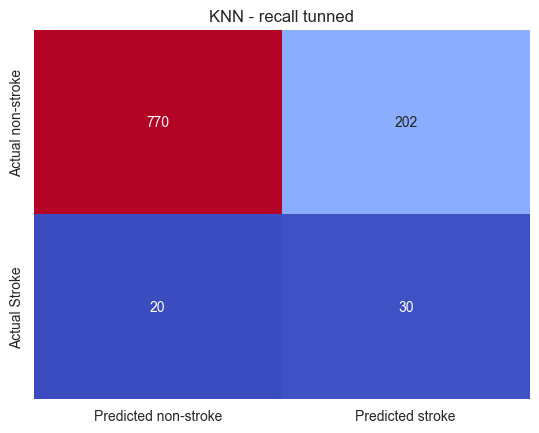

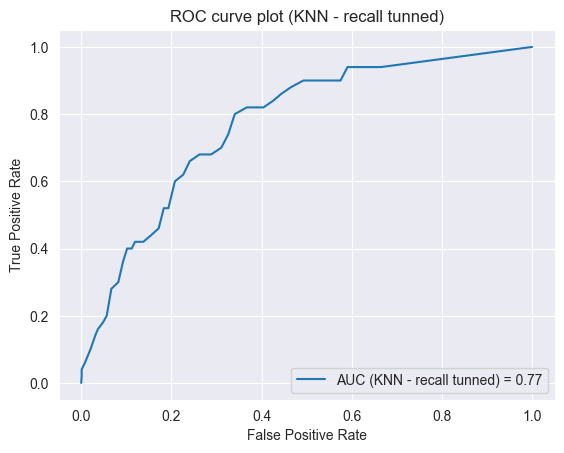

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       972
           1       0.13      0.60      0.21        50

    accuracy                           0.78      1022
   macro avg       0.55      0.70      0.54      1022
weighted avg       0.93      0.78      0.84      1022



In [34]:
test_model(X_train, y_train, X_test, y_test, ['KNN - recall tunned', model, True])

In [35]:
# tune_model(KNeighborsClassifier(), knn_params, X_train_init, y_train_init, True, "f1")

In [36]:
model = KNeighborsClassifier(leaf_size = 1, n_neighbors = 38, weights = 'uniform')

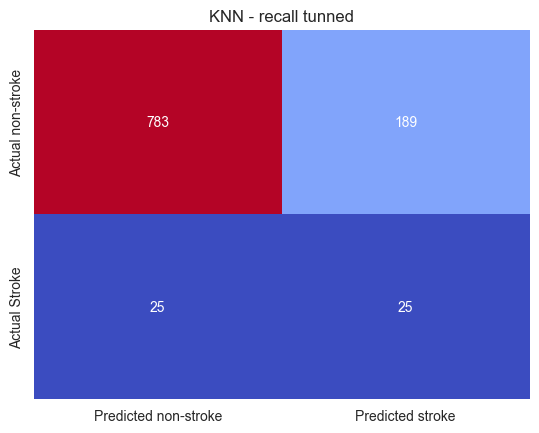

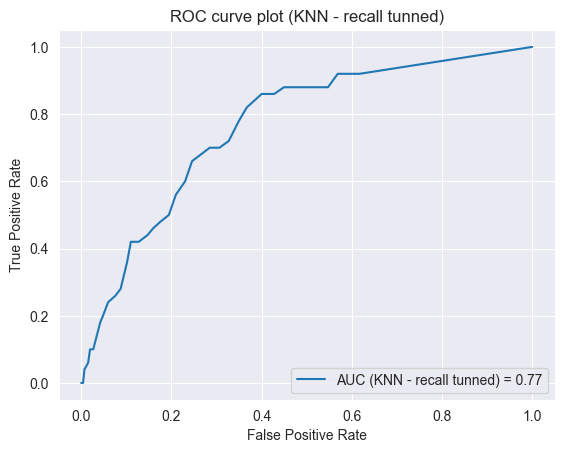

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       972
           1       0.12      0.50      0.19        50

    accuracy                           0.79      1022
   macro avg       0.54      0.65      0.53      1022
weighted avg       0.93      0.79      0.85      1022



In [37]:
test_model(X_train, y_train, X_test, y_test, ['KNN - recall tunned', model, True])

#### RFC tuning

In [38]:
# rfc_params = { 
#     'classifier__n_estimators': [25, 50, 100, 200, 500],
#     'classifier__max_features': ['sqrt', 'log2'],
#     'classifier__max_depth' : [4,5,6,7,8,9, 10],
#     'classifier__criterion' :['gini', 'entropy']
# }

rfc_params = { 
    'classifier__n_estimators': [25, 50],
    'classifier__max_features': ['log2'],
    'classifier__max_depth' : [4],
    'classifier__criterion' :['gini']
}

In [39]:
# tune_model(RandomForestClassifier(), rfc_params, X_train_init, y_train_init, False, 'f1')

In [40]:
rfc_params = { 
    'classifier__n_estimators': [25, 50, 100, 200, 500],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_depth' : [1,2,3,4],
    'classifier__criterion' :['gini', 'entropy']
}

# tune_model(RandomForestClassifier(),rfc_params, X_train_init, y_train_init, False, 'recall')

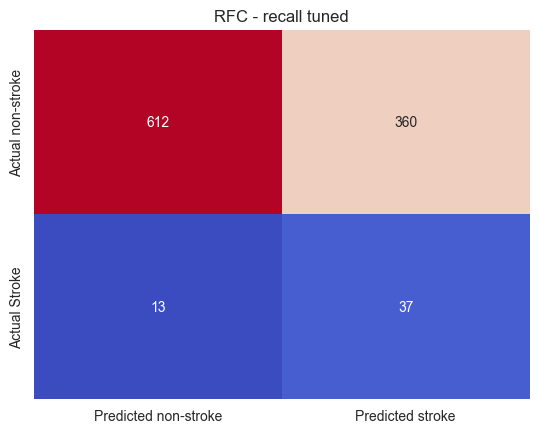

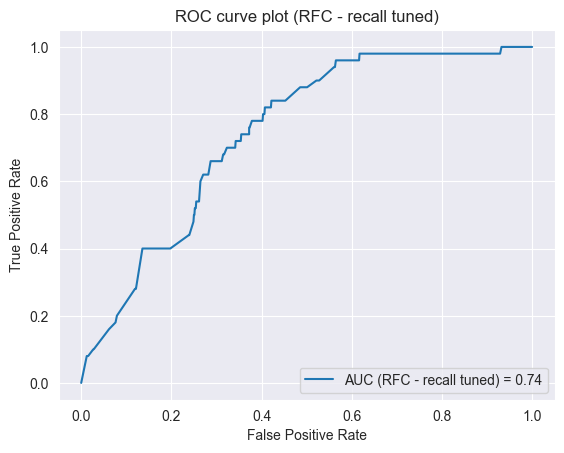

              precision    recall  f1-score   support

           0       0.98      0.63      0.77       972
           1       0.09      0.74      0.17        50

    accuracy                           0.64      1022
   macro avg       0.54      0.68      0.47      1022
weighted avg       0.94      0.64      0.74      1022



In [41]:
model = RandomForestClassifier(max_features='log2',
                                    n_estimators= 100,
                                    max_depth=1, 
                                    criterion='entropy')

test_model(X_train, y_train, X_test, y_test, ['RFC - recall tuned', model, False])

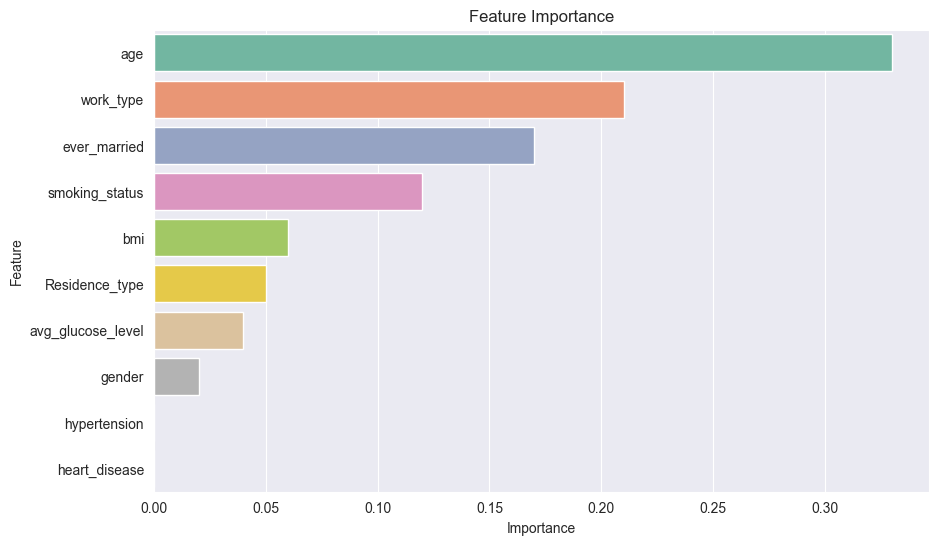

In [42]:

feature_importance(model, False, X_train, y_train)


## AdaBoost tuning

In [43]:
adaboost_params = {
    'classifier__n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 100, 120],
    'classifier__learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0, 1.05, 1.1, 1.15],
    'classifier__algorithm': ['SAMME', 'SAMME.R'],
    'classifier__estimator': [DecisionTreeClassifier(), ExtraTreeClassifier(), LogisticRegression()]
}

In [44]:
# tune_model(AdaBoostClassifier(), adaboost_params, X_train_init, y_train_init, False, 'f1')

In [45]:
model = AdaBoostClassifier(estimator = LogisticRegression(),
                           n_estimators = 45, 
                           learning_rate = 0.1,
                           algorithm = 'SAMME')

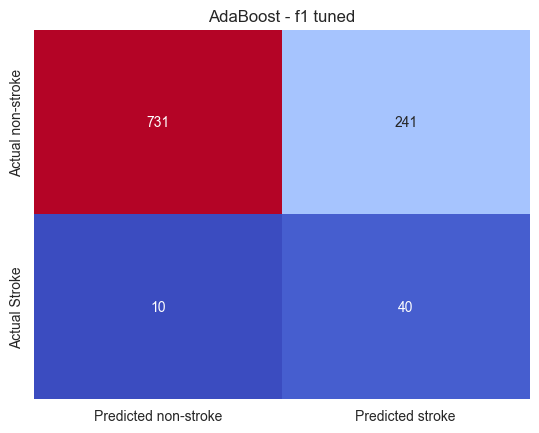

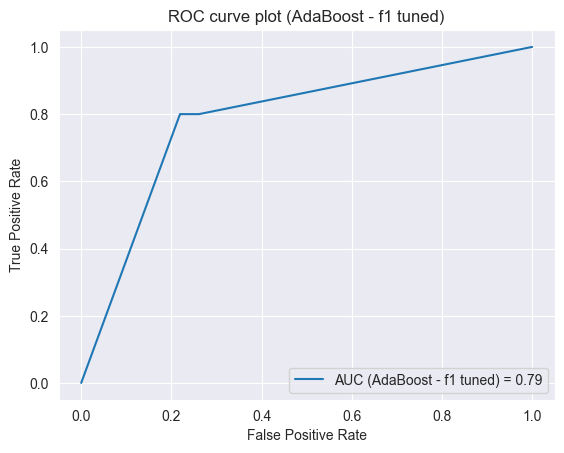

              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.78      0.55      1022
weighted avg       0.95      0.75      0.82      1022



In [46]:
test_model(X_train, y_train, X_test, y_test, ['AdaBoost - f1 tuned', model, False])

In [47]:
# tune_model(AdaBoostClassifier(), adaboost_params, X_train_init, y_train_init, False, 'recall')

In [48]:
model = AdaBoostClassifier(estimator = LogisticRegression(),
                           n_estimators = 2, 
                           learning_rate = 0.0001,
                           algorithm = 'SAMME')

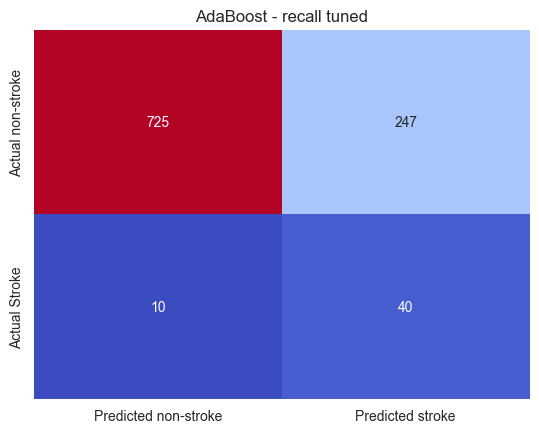

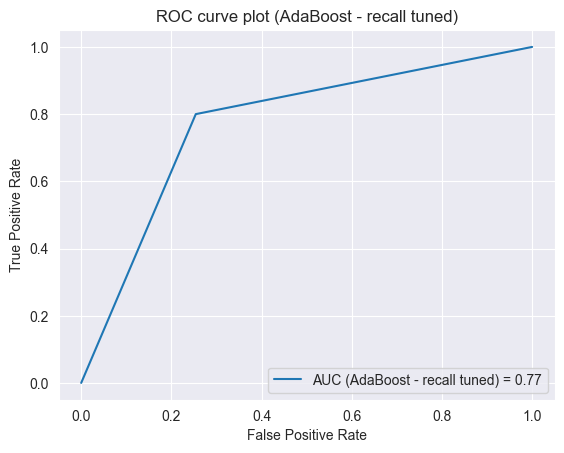

              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.75      0.82      1022



In [49]:
test_model(X_train, y_train, X_test, y_test, ['AdaBoost - recall tuned', model, False])

## SVM tuning

In [50]:
#svm_params = {
#    'classifier__C': [0.1, 1, 10, 100, 1000],
#    'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#    'classifier__kernel': ['linear', 'rbf', 'sigmoid']
#}

svm_params = {
    'classifier__C': [0.1],
    'classifier__gamma': [0.001],
    'classifier__kernel': ['sigmoid']
}

In [51]:
tune_model(SVC(), svm_params, X_train_init, y_train_init, True, 'recall')

'classifier__C': '0.1'
'classifier__gamma': '0.001'
'classifier__kernel': 'sigmoid'


In [52]:
model = SVC(C = 10, gamma = 0.001, kernel = 'rbf', probability=True)

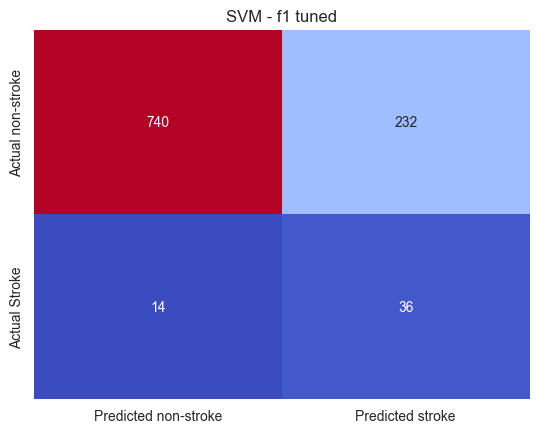

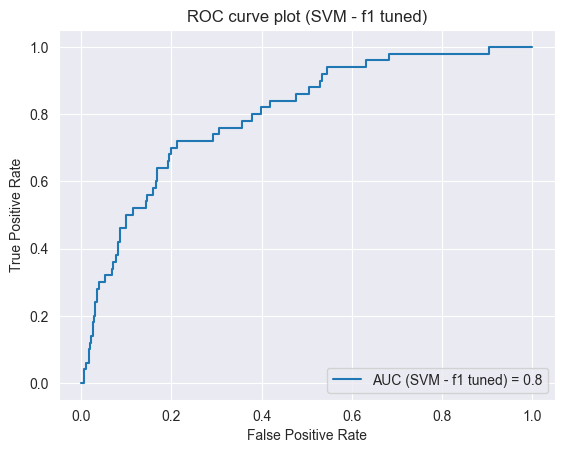

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       972
           1       0.13      0.72      0.23        50

    accuracy                           0.76      1022
   macro avg       0.56      0.74      0.54      1022
weighted avg       0.94      0.76      0.83      1022



In [53]:
test_model(X_train, y_train, X_test, y_test, ['SVM - f1 tuned', model, True])

In [54]:
# tune_model(SVC(), svm_params, X_train_init, y_train_init, True, 'recall')

In [55]:
model = SVC(C = 0.1, gamma = 0.001, kernel = 'sigmoid', probability=True)

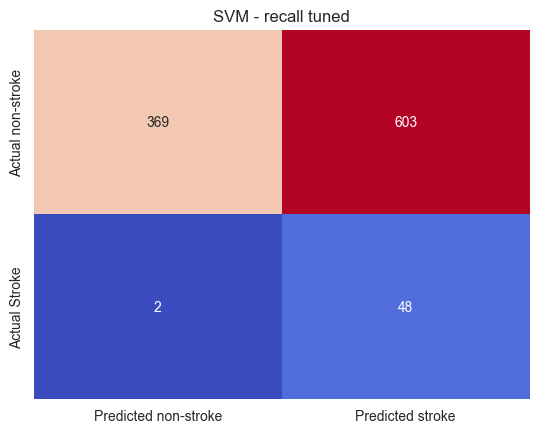

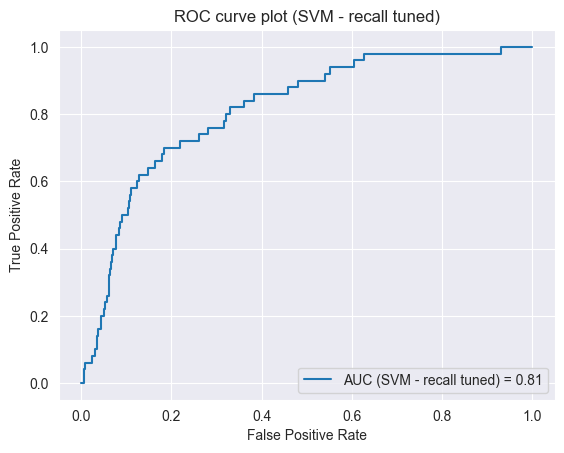

              precision    recall  f1-score   support

           0       0.99      0.38      0.55       972
           1       0.07      0.96      0.14        50

    accuracy                           0.41      1022
   macro avg       0.53      0.67      0.34      1022
weighted avg       0.95      0.41      0.53      1022



In [56]:
test_model(X_train, y_train, X_test, y_test, ['SVM - recall tuned', model, True])